In [36]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization, Conv2D, Activation, Flatten, Dropout, Dense, MaxPooling2D
from tensorflow.keras import backend as k
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import cv2
import os
import glob
import random
from tensorflow.keras import backend as K

In [24]:
# initial parameters
epochs = 100
lr = 1e-3
batch_size = 64
img_dims = (96,96,3)

In [25]:
data =[]
labels =[]

In [26]:
# load image file from the dataset
image_files = [f for f in glob.glob(r'C:\Users\schan\Downloads\CNN Gender Detect\gender_dataset_face' + "/**/*")]
#recursive= True if not os.path.isdir(f)
random.shuffle(image_files)

In [27]:
# converting images to arrays and labelling the categories
for img in image_files:
    image = cv2.imread(img)
    image = cv2.resize (image, (img_dims[0],img_dims[1]))
    image = img_to_array(image)
    data.append(image)
    label = img.split(os.path.sep)[-2]
    
    if label == 'women':
        label = 1
    else:
        label = 0
    labels.append([label])

In [28]:
# pre_processing
data = np.array(data, dtype = 'float') / 255.0
label = np.array(labels)

In [29]:
# split dataset for training and validation
x_train, x_test, y_train, y_test = train_test_split(data, label, test_size=0.2, random_state=42)

y_train = to_categorical(y_train, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)

In [30]:
# augmentating dataset
aug= ImageDataGenerator(rotation_range=25, width_shift_range=0.1,
                       height_shift_range=0.1, shear_range=0.3, zoom_range= 0.2,
                       horizontal_flip=True,fill_mode="nearest")

In [37]:

# define model
def build(width, height, depth, classes):
    model = Sequential()
    inputShape = (height, width, depth)
    chanDim = -1

    if K.image_data_format() == "channels_first": #Returns a string, either 'channels_first' or 'channels_last'
        inputShape = (depth, height, width)
        chanDim = 1
    
        
# The axis that should be normalized, after a Conv2D layer with data_format="channels_first", 
# set axis=1 in BatchNormalization.

    model.add(Conv2D(32, (3,3), padding="same", input_shape=inputShape))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(3,3)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))

    model.add(Conv2D(64, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(128, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))

    model.add(Conv2D(128, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(1024))
    model.add(Activation("relu"))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    model.add(Dense(classes))
    model.add(Activation("sigmoid"))
    return model



In [38]:
# build model
model = build(width=img_dims[0], height=img_dims[1], depth=img_dims[2],
                            classes=2)

In [40]:
# compile the model
opt =Adam (lr=lr,decay=lr/epochs)
model.compile(loss = "binary_crossentropy", optimizer = opt, metrics=['accuracy'])

In [41]:
gen = model.fit_generator(aug.flow(x_train, y_train, batch_size = batch_size),validation_data = (x_test, y_test),
                          steps_per_epoch = len(x_train) // batch_size,
                         epochs = epochs, verbose = 1)

C:\Users\schan\AppData\Local\Temp\ipykernel_15556\388144527.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  gen = model.fit_generator(aug.flow(x_train, y_train, batch_size = batch_size),validation_data = (x_test, y_test),


Epoch 1/100
28/28 [==============================] - 38s 1s/step - loss: 0.8223 - accuracy: 0.6429 - val_loss: 0.0220 - val_accuracy: 1.0000
Epoch 2/100
28/28 [==============================] - 32s 1s/step - loss: 0.4268 - accuracy: 0.8883 - val_loss: 0.0095 - val_accuracy: 1.0000
Epoch 3/100
28/28 [==============================] - 33s 1s/step - loss: 0.2021 - accuracy: 0.9820 - val_loss: 0.0031 - val_accuracy: 1.0000
Epoch 4/100
28/28 [==============================] - 32s 1s/step - loss: 0.0864 - accuracy: 0.9966 - val_loss: 6.1866e-08 - val_accuracy: 1.0000
Epoch 5/100
28/28 [==============================] - 32s 1s/step - loss: 0.0461 - accuracy: 0.9994 - val_loss: 1.9048e-04 - val_accuracy: 1.0000
Epoch 6/100
28/28 [==============================] - 33s 1s/step - loss: 0.0275 - accuracy: 0.9994 - val_loss: 1.6457e-04 - val_accuracy: 1.0000
Epoch 7/100
28/28 [==============================] - 32s 1s/step - loss: 0.0156 - accuracy: 0.9994 - val_loss: 6.2990e-05 - val_accuracy: 1.00

Epoch 57/100
28/28 [==============================] - 32s 1s/step - loss: 1.8003e-04 - accuracy: 1.0000 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 58/100
28/28 [==============================] - 33s 1s/step - loss: 1.6291e-04 - accuracy: 1.0000 - val_loss: 0.0016 - val_accuracy: 1.0000
Epoch 59/100
28/28 [==============================] - 32s 1s/step - loss: 1.5869e-04 - accuracy: 1.0000 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 60/100
28/28 [==============================] - 32s 1s/step - loss: 1.4878e-04 - accuracy: 1.0000 - val_loss: 5.4646e-04 - val_accuracy: 1.0000
Epoch 61/100
28/28 [==============================] - 33s 1s/step - loss: 1.2886e-04 - accuracy: 1.0000 - val_loss: 4.5105e-04 - val_accuracy: 1.0000
Epoch 62/100
28/28 [==============================] - 32s 1s/step - loss: 1.2391e-04 - accuracy: 1.0000 - val_loss: 5.1499e-04 - val_accuracy: 1.0000
Epoch 63/100
28/28 [==============================] - 33s 1s/step - loss: 1.1461e-04 - accuracy: 1.0000 - val_lo

In [61]:
import warnings
warnings.filterwarnings('ignore')

In [65]:
model.save(r'C:\Users\schan\Downloads\CNN Gender Detect\gender_detection.model')

INFO:tensorflow:Assets written to: C:\Users\schan\Downloads\CNN Gender Detect\gender_detection.model\assets


INFO:tensorflow:Assets written to: C:\Users\schan\Downloads\CNN Gender Detect\gender_detection.model\assets


In [64]:
model.save('gender_detection.model')

INFO:tensorflow:Assets written to: gender_detection.model\assets


INFO:tensorflow:Assets written to: gender_detection.model\assets


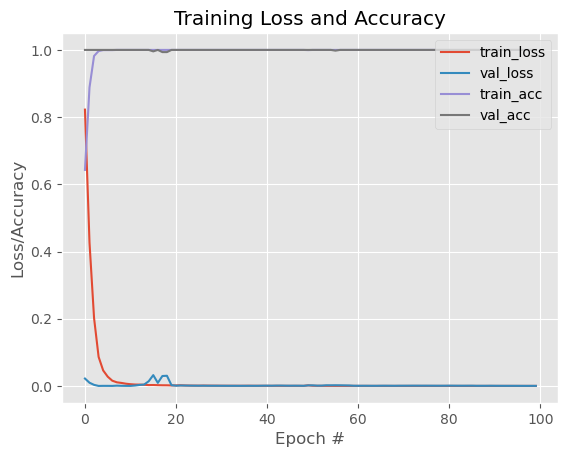

In [56]:
# plot training/validation loss/accuracy
plt.style.use("ggplot")
plt.figure()
N = epochs
plt.plot(np.arange(0,N), gen.history["loss"], label="train_loss")
plt.plot(np.arange(0,N), gen.history["val_loss"], label="val_loss")
plt.plot(np.arange(0,N), gen.history["accuracy"], label="train_acc")
plt.plot(np.arange(0,N), gen.history["val_accuracy"], label="val_acc")

plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper right")

# save plot to disk
plt.savefig('plot.png')